# Лабораторная 1 Введение в вейвлет-анализ

Цель работы:
 - Получить общее представлении о вейвлет-анализе и основных типах вейвлетов, понять основные свйства и особенности использования вейвлетов.

Английское слово wavelet (от французского «ondelette») дословно переводится как «короткая (маленькая) волна». В различных переводах зарубежных статей на русский язык встречаются еще термины: «всплеск», «всплесковая функция», «маловолновая функция», «волночка» и др.  

Вейвлет-преобразование (ВП) широко используется для анализа сигналов. Помимо этого, оно находит большое применение в области сжатия данных. ВП одномерного сигнала – это его представление ввиде обобщенного ряда или интеграла Фурье по системе базисных функций:

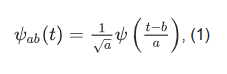

сконструированных из материнского (исходного) вейвлета , обладающего определенными свойствами за счет операций сдвига во времени ( b ) и изменения временного масштаба (a).

Множитель $  \frac{1}{\sqrt{a}} $ обеспечивает независимость нормы функций (1) от масштабирующего числа (a). Для заданных значений параметров a и b функция $ 𝜓_{ab} (t) $ и есть вейвлет, порождаемый материнским вейвлетом $ 𝜓(t)$.

Одно  из основных отличий вейвлетов-преобразования от преобразования Фурье - локальность во времени, что позволяет анализировать нестационарные сигналы. Преобразования Фурье будет работать очень хорошо, когда частотный спектр стационарный. При этом частоты, присутствующие в сигнале, не зависят от времени, и сигнал содержит частоты xHz, которые присутствует в любом месте сигнала. Чем нестационарнее сигнал, тем хуже будут результаты. Это проблема, так как большинство сигналов, которые мы видим в реальной жизни, нестационарны по своей природе. Преобразование Фурье имеет высокое разрешение в частотной области, но нулевое разрешение во временной области. 

Покажем это на примере:

C:\Users\LightSoul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


Сумма четырёх гармоник, полигармонический сигнал


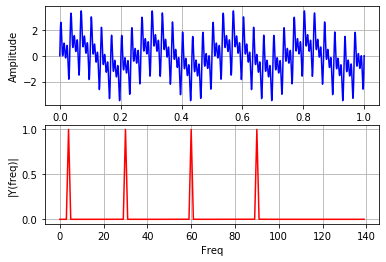

Сигнал с изменяющейся частотой, 4 разные гармоники следуют друг за другом


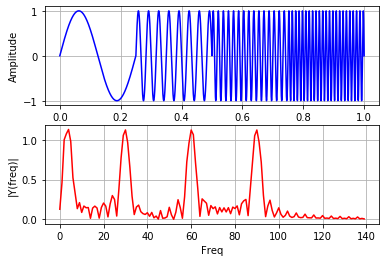

In [33]:
import numpy as np
from scipy import fftpack
from pylab import*
N=100000
dt = 1e-5
xa = np.linspace(0, 1, num=N)
xb = np.linspace(0, 1/4, num=N/4) 
frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)
def spectrum_w(y):    
    Fs = 1 / dt  #  Fs = 0,1 MHz 
    n = len(y)  # длительность сигнала
    k = np.arange(n)
    T = n / Fs
    frq = k / T  # частотный диапазон x2
    frq = frq[range(n // 2)]  # one side frequency range
    Y = fftpack.fft(y) / n 
    Y = Y[range(n // 2)] / max(Y[range(n // 2)])
    subplot(2, 1, 1)
    plot(k/N , y, 'b')    
    ylabel('Amplitude')
    grid()
    subplot(2, 1, 2)
    plot(frq[0:140], abs(Y[0:140]), 'r')
    xlabel('Freq')
    plt.ylabel('|Y(freq)|')
    grid() 
y= y1a + y2a + y3a + y4a
y1 = np.concatenate([y1b, y2b, y3b, y4b])
print("Сумма четырёх гармоник, полигармонический сигнал")
spectrum_w(y)
show()
print("Сигнал с изменяющейся частотой, 4 разные гармоники следуют друг за другом")
spectrum_w(y1)
show()

##Главные признаки вейвлета

**Ограниченность**. Квадрат нормы функции должен быть конечным:
$\left \| \psi \right \|^{2}=\int_{-\infty }^{\infty }\left | \psi (t) \right |^{2}dt< \infty$. (2)

**Локализация**. ВП в отличие от преобразования Фурье использует локализованную исходную функцию и во времени, и по частоте. Для этого достаточно, чтобы выполнялись условия:

 $\left | \psi (t) \right |\leq C(1+\left | t \right |)^{-1-\varepsilon } $ и
 
 $\left | S_{\psi }(\omega ) \right |\leq C(1+\left | \omega \right |)^{-1-\varepsilon } $ при $\varepsilon > 0$, (3)

Например, дельта-функция $\delta(t)$ и гармоническая функция не удовлетворяют необходимому условию одновременной локализации во временной и частотной областях.

**Нулевое среднее.** График исходной функции должен осциллировать (быть знакопеременным) вокруг нуля на оси времени и иметь нулевую площадь:

$\int_{-\infty }^{\infty }\psi (t)dt=0$. (4)

Из этого условия становится понятным выбор названия «вейвлет» – маленькая волна.

Равенство нулю площади функции $\psi(t)$, т.е. нулевого момента, приводит к тому, что фурье-преобразование $S_{\psi}(\omega)$ этой функции равно нулю при $\omega$ и имеет вид полосового фильтра. При различных значениях (a) это будет набор полосовых фильтров.

Часто для приложений бывает необходимо, чтобы не только нулевой, но и все первые n моментов были равны нулю:

$\int_{-\infty }^{\infty }t^{^{n}}\psi (t)dt=0$. (5)

Вейвлеты n -го порядка позволяют анализировать более тонкую (высокочастотную) структуру сигнала, подавляя медленно изменяющиеся его составляющие.

**Автомодельность.** Характерным признаком ВП является его самоподобие. Все вейвлеты конкретного семейства $\psi_{ab}(t)$ имеют то же число осцилляций, что и материнский вейвлет $\psi(t)$, поскольку получены из него посредством масштабных преобразований ( a ) и сдвига ( b ).



Перейдём непосредственно к рассмотрению различных вейвлет функций и влиянию параметров сдвига во времени b м изменения временного масштаба на их вид.

 Задание 1:
  - посмотреть как влияют параметры a и b на вид вейвлетов во временной и частотной области, сделать скриншоты и сравнить их для 4-5 различных значений параметров a и b. Сделать выводы и попытаться провести параллели с преобразованием Фурье.
  - для вейвлетов Гаусса и Шеннона построить временные и частотные графики для различных порядков, сравнить и сделать выводы.

In [3]:
%matplotlib inline
from numpy import*
from pylab import *
from scipy import *
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt
from ipywidgets import interactive

plt.ion()
x = arange(-4,30,0.01)
def w(a,b,t):    
    f =(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)
    return f
def f(a,b):
    plt.title("Вейвлет «Мексиканская шляпа»:\n$1/\sqrt{a}*exp(-0,5*t^{2}/a^{2})*(t^{2}-1)$")
    y=[w(a,b,t) for t in x]
    plt.ylim(-1.0, 0.6)
    plt.plot(x,y,label="$\psi(t)$ a={},b={}".format(a,b)) 
    plt.ylabel('|Y(f)|')
    plt.xlabel('t (s)')
    plt.legend()
    plt.grid(True)
    plt.show()  
interactive_plot = interactive(f, a=(1, 10), b=(1, 30))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=15, description='b',…

IntSlider(value=1, description='Параметр "а"', max=10, min=1)

IntSlider(value=12, description='Параметр "b"', max=40, min=1)

Button(description='Построить', style=ButtonStyle())

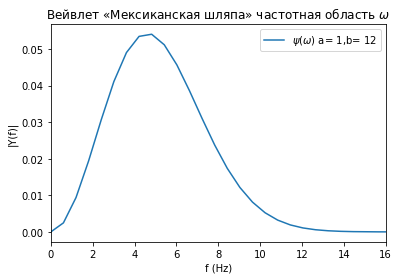

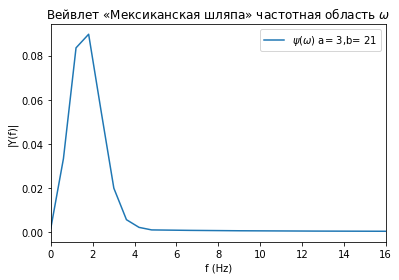

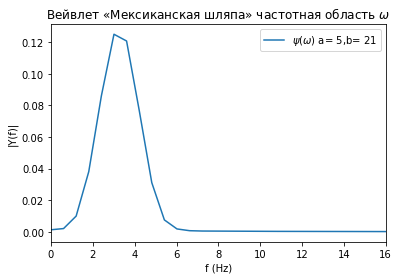

In [1]:
from numpy import*
from pylab import *
from scipy import *
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt

def w(a,b,t):    
    f =(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)
    return f

def plotSpectrum(y,Fs):
 n = len(y) 
 k = arange(n)
 T = n/Fs
 frq = k/T
 frq = frq[range(int(n/2))] 
 Y = fft(y)/n 
 Y = Y[range(int(n/2))]
 return Y,frq 

plt.ion()
slider_a1 = widgets.IntSlider(min=1, max=10, continuous_update=True, description='Параметр "а"')
slider_b1 = widgets.IntSlider(min=1, max=40, value=12, continuous_update=True, description='Параметр "b"')

def on_button_clicked(b):
    x= arange(-4,30,0.02)
    Fs=1024.0
    plt.xlim(-0.000, 16.000)
    y=[w(slider_a1.value,slider_b1.value,t) for t in x]
    Y,frq=plotSpectrum(y,Fs)
    ax = plt.gca()
    ax.plot(frq,abs(Y),label="$\psi(\omega)$ a= {},b= {}".format(slider_a1.value,slider_b1.value))
    ax.set_title("Вейвлет «Мексиканская шляпа» частотная область $\omega$")
    ax.set_ylabel('|Y(f)|')
    ax.set_xlabel('f (Hz)')
    ax.legend()
    plt.draw()
  
button = widgets.Button(description="Построить")
button.on_click(on_button_clicked)

display(slider_a1)
display(slider_b1)
display(button)
plt.show()

In [2]:
%matplotlib inline
from numpy import*
from pylab import *
from scipy import *
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt
from ipywidgets import interactive

def w(a,b,t):    
    f =(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)
    return f
def plotSpectrum(y,Fs):
 n = len(y) 
 k = arange(n)
 T = n/Fs
 frq = k/T
 frq = frq[range(int(n/2))] 
 Y = fft(y)/n 
 Y = Y[range(int(n/2))]
 return Y,frq 

plt.ion()
slider_a = widgets.IntSlider(min=1, max=10, continuous_update=True, description='Параметр "а"')
slider_b = widgets.IntSlider(min=1, max=40, value=12, continuous_update=True, description='Параметр "b"')

def f(a,b):
    plt.xlim(0, 20)
    Fs=1024.0
    x= arange(-4,30,0.02)
    y=[w(a,b,t) for t in x]
    Y,frq=plotSpectrum(y,Fs)
    plt.plot(frq,abs(Y),label="$\psi(\omega)$ a= {},b= {}".format(a,b))
    plt.title("Вейвлет «Мексиканская шляпа» частотная область $\omega$")
    plt.ylabel('|Y(f)|')
    plt.xlabel('f (Hz)')
    plt.legend()
    plt.show()
  
interactive_plot = interactive(f, a=(1, 10), b=(1, 12))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=6, description='b', …

In [16]:
%matplotlib inline
from numpy import*
from pylab import *
from scipy import *
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt
from ipywidgets import interactive

plt.ion()
x = arange(-4,30,0.01)
def w(a,b,t):    
    f =exp(-((t-b)/a)**2)* cos(5*(t-b)/a)
    return f
def f(a,b):
    plt.title("Вещественный Вейвлет Морле:\n$exp(-t^{2}/a^{2})*cos(5t)$")
    y=[w(a,b,t) for t in x]
    plt.ylim(-1.0, 1.1)
    plt.plot(x,y,label="$\psi(t)$ a={},b={}".format(a,b)) 
    plt.ylabel('|Y(f)|')
    plt.xlabel('t (s)')
    plt.legend()
    plt.grid(True)
    plt.show()  
interactive_plot = interactive(f, a=(1, 10), b=(1, 30))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=15, description='b',…

IntSlider(value=1, description='Параметр "а"', max=10, min=1)

IntSlider(value=12, description='Параметр "b"', max=40, min=1)

Button(description='Построить', style=ButtonStyle())

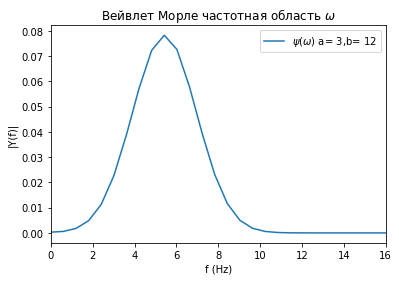

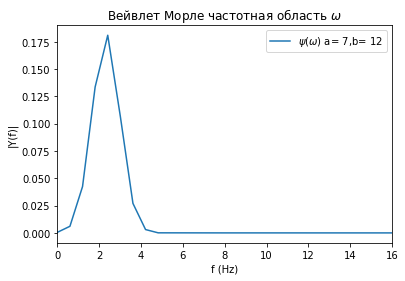

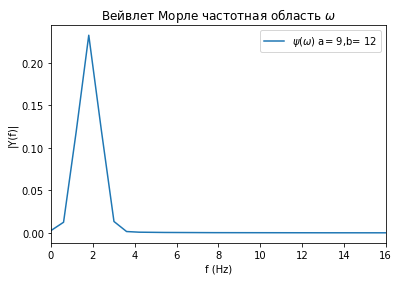

In [17]:
from numpy import*
from pylab import *
from scipy import *
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt

def w(a,b,t):    
    f =exp(-((t-b)/a)**2)* cos(5*(t-b)/a)
    return f

def plotSpectrum(y,Fs):
 n = len(y) 
 k = arange(n)
 T = n/Fs
 frq = k/T
 frq = frq[range(int(n/2))] 
 Y = fft(y)/n 
 Y = Y[range(int(n/2))]
 return Y,frq 

plt.ion()
slider_a1 = widgets.IntSlider(min=1, max=10, continuous_update=True, description='Параметр "а"')
slider_b1 = widgets.IntSlider(min=1, max=40, value=12, continuous_update=True, description='Параметр "b"')

def on_button_clicked(b):
    x= arange(-4,30,0.02)
    Fs=1024.0
    plt.xlim(-0.000, 16.000)
    y=[w(slider_a1.value,slider_b1.value,t) for t in x]
    Y,frq=plotSpectrum(y,Fs)
    ax = plt.gca()
    ax.plot(frq,abs(Y),label="$\psi(\omega)$ a= {},b= {}".format(slider_a1.value,slider_b1.value))
    ax.set_title("Вейвлет Морле частотная область $\omega$")
    ax.set_ylabel('|Y(f)|')
    ax.set_xlabel('f (Hz)')
    ax.legend()
    plt.draw()
  
button = widgets.Button(description="Построить")
button.on_click(on_button_clicked)

display(slider_a1)
display(slider_b1)
display(button)
plt.show()

Те же самые закономерности можно наблюдать и для других вейвлетов, поэтому перейдём к рассмотрению влияния порядка некоторых вейвлетов на их характеристики. Вейвлет "мексиманская шляпа" - это Гауссов вейвлет второго порядка. Гауссов вейвлет первого порядка называется wave-вейвлетов.

Вещественный вейвлет Гаусса заданного порядка


IntSlider(value=1, description='Порядок', max=8, min=1)

Button(description='Построить', style=ButtonStyle())

Непрерывный вейвлет будет оцениваться во всем диапазоне [-5.0, 5.0]


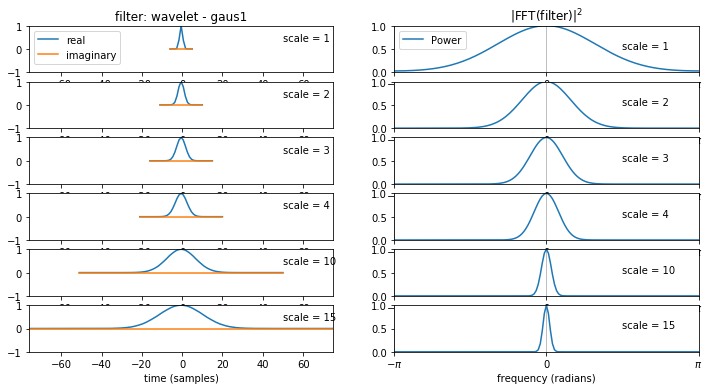

Непрерывный вейвлет будет оцениваться во всем диапазоне [-5.0, 5.0]


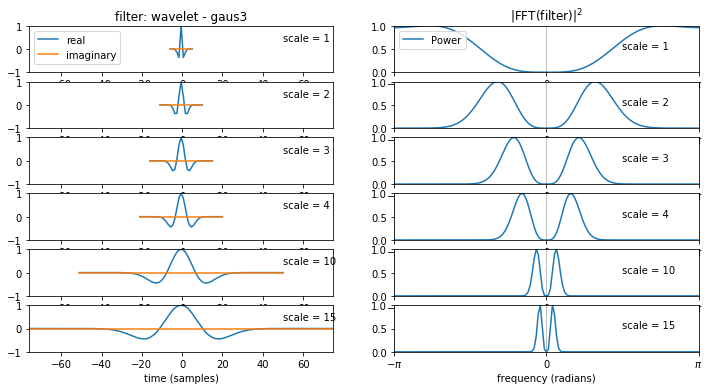

Непрерывный вейвлет будет оцениваться во всем диапазоне [-5.0, 5.0]


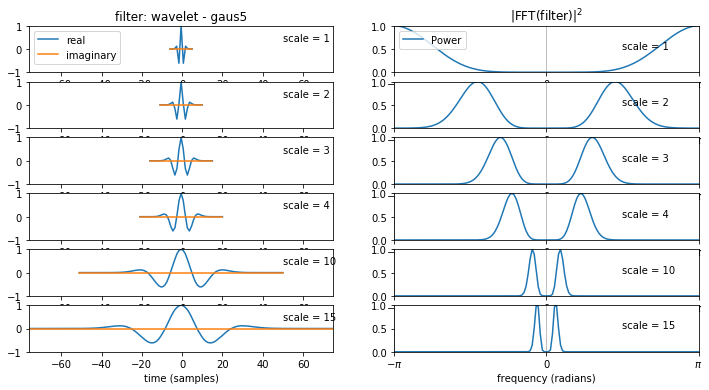

In [23]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def on_button_clicked(b):
    vav='gaus{}'.format(slider.value)
    wav = pywt.ContinuousWavelet(vav)
    # вывести диапазон, в котором будет оцениваться вейвлет
    print("Непрерывный вейвлет будет оцениваться во всем диапазоне [{}, {}]".format(   wav.lower_bound, wav.upper_bound))
    width = wav.upper_bound - wav.lower_bound
    scales = [1, 2, 3, 4, 10, 15]
    max_len = int(np.max(scales)*width + 1)
    t = np.arange(max_len)
    fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
    for n, scale in enumerate(scales):
        # Следующий код адаптирован из внутренних частей cwt
        int_psi, x = pywt.integrate_wavelet(wav, precision=10)
        step = x[1] - x[0]
        j = np.floor(
            np.arange(scale * width + 1) / (scale * step))
        if np.max(j) >= np.size(int_psi):
            j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
        j = j.astype(np.int)
        # normalize int_psi для более простого построения
        int_psi /= np.abs(int_psi).max()
      # дискретные выборки интегрированного вейвлета
        filt = int_psi[j][::-1]
    # CWT состоит из свертки фильтра с сигналом в этой шкале
    # Здесь мы строим это дискретное ядро свертки в каждом масштабе.
        nt = len(filt)
        t = np.linspace(-nt//2, nt//2, nt)
        axes[n, 0].plot(t, filt.real, t, filt.imag)
        axes[n, 0].set_xlim([-max_len//2, max_len//2])
        axes[n, 0].set_ylim([-1, 1])
        axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))
        f = np.linspace(-np.pi, np.pi, max_len)
        filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
        filt_fft /= np.abs(filt_fft).max()
        axes[n, 1].plot(f, np.abs(filt_fft)**2)
        axes[n, 1].set_xlim([-np.pi, np.pi])
        axes[n, 1].set_ylim([0, 1])
        axes[n, 1].set_xticks([-np.pi, 0, np.pi])
        axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
        axes[n, 1].grid(True, axis='x')
        axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))
    axes[n, 0].set_xlabel('time (samples)')
    axes[n, 1].set_xlabel('frequency (radians)')
    axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
    axes[0, 1].legend(['Power'], loc='upper left')
    axes[0, 0].set_title('filter: wavelet - %s'%vav)
    axes[0, 1].set_title(r'|FFT(filter)|$^2$')
    plt.show()
    
print("Вещественный вейвлет Гаусса заданного порядка")    
slider = widgets.IntSlider(min=1, max=8, continuous_update=True, description='Порядок')
display(slider)
button = widgets.Button(description="Построить")
button.on_click(on_button_clicked)
display(button)


In [32]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def on_button_clicked(b):
    vav='cgau{}'.format(slider.value)
    wav = pywt.ContinuousWavelet(vav)
    # вывести диапазон, в котором будет оцениваться вейвлет
    print("Непрерывный вейвлет будет оцениваться во всем диапазоне [{}, {}]".format(   wav.lower_bound, wav.upper_bound))
    width = wav.upper_bound - wav.lower_bound
    scales = [1, 2, 3, 4, 10, 15]
    max_len = int(np.max(scales)*width + 1)
    t = np.arange(max_len)
    fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
    for n, scale in enumerate(scales):
        # Следующий код адаптирован из внутренних частей cwt
        int_psi, x = pywt.integrate_wavelet(wav, precision=10)
        step = x[1] - x[0]
        j = np.floor(
            np.arange(scale * width + 1) / (scale * step))
        if np.max(j) >= np.size(int_psi):
            j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
        j = j.astype(np.int)
        # normalize int_psi для более простого построения
        int_psi /= np.abs(int_psi).max()
      # дискретные выборки интегрированного вейвлета
        filt = int_psi[j][::-1]
    # CWT состоит из свертки фильтра с сигналом в этой шкале
    # Здесь мы строим это дискретное ядро свертки в каждом масштабе.
        nt = len(filt)
        t = np.linspace(-nt//2, nt//2, nt)
        axes[n, 0].plot(t, filt.real, t, filt.imag)
        axes[n, 0].set_xlim([-max_len//2, max_len//2])
        axes[n, 0].set_ylim([-1, 1])
        axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))
        f = np.linspace(-np.pi, np.pi, max_len)
        filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
        filt_fft /= np.abs(filt_fft).max()
        axes[n, 1].plot(f, np.abs(filt_fft)**2)
        axes[n, 1].set_xlim([-np.pi, np.pi])
        axes[n, 1].set_ylim([0, 1])
        axes[n, 1].set_xticks([-np.pi, 0, np.pi])
        axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
        axes[n, 1].grid(True, axis='x')
        axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))
    axes[n, 0].set_xlabel('time (samples)')
    axes[n, 1].set_xlabel('frequency (radians)')
    axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
    axes[0, 1].legend(['Power'], loc='upper left')
    axes[0, 0].set_title('filter: wavelet - %s'%vav)
    axes[0, 1].set_title(r'|FFT(filter)|$^2$')
    plt.show()
    
print("Комплексный вейвлет Гаусса заданного порядка")    
slider = widgets.IntSlider(min=1, max=8, continuous_update=True, description='Порядок')
display(slider)
button = widgets.Button(description="Построить")
button.on_click(on_button_clicked)
display(button)


Комплексный вейвлет Гаусса заданного порядка


IntSlider(value=1, description='Порядок', max=8, min=1)

Button(description='Построить', style=ButtonStyle())

Вейвлет Шеннона заданного порядка


IntSlider(value=1, description='Порядок', max=8, min=1)

Button(description='Построить', style=ButtonStyle())

Непрерывный вейвлет будет оцениваться во всем диапазоне [-20.0, 20.0]


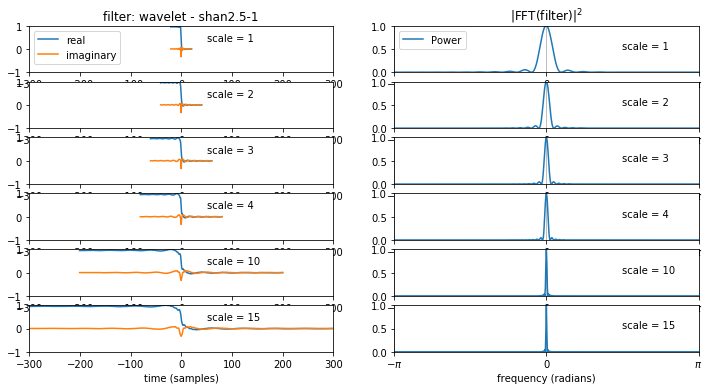

Непрерывный вейвлет будет оцениваться во всем диапазоне [-20.0, 20.0]


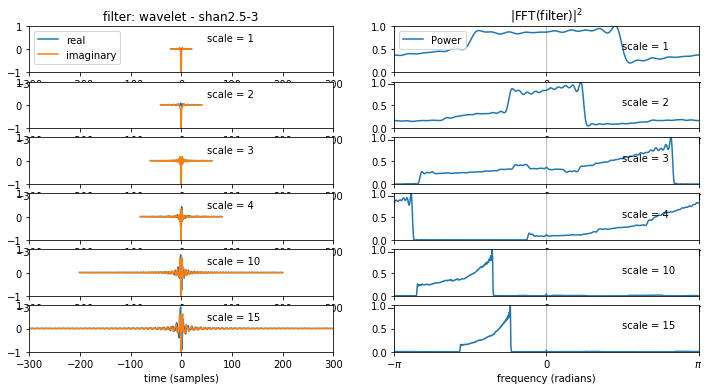

In [31]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def on_button_clicked(b):
    vav='shan2.5-{}'.format(slider.value)
    wav = pywt.ContinuousWavelet(vav)
    # вывести диапазон, в котором будет оцениваться вейвлет
    print("Непрерывный вейвлет будет оцениваться во всем диапазоне [{}, {}]".format(   wav.lower_bound, wav.upper_bound))
    width = wav.upper_bound - wav.lower_bound
    scales = [1, 2, 3, 4, 10, 15]
    max_len = int(np.max(scales)*width + 1)
    t = np.arange(max_len)
    fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
    for n, scale in enumerate(scales):
        # Следующий код адаптирован из внутренних частей cwt
        int_psi, x = pywt.integrate_wavelet(wav, precision=10)
        step = x[1] - x[0]
        j = np.floor(
            np.arange(scale * width + 1) / (scale * step))
        if np.max(j) >= np.size(int_psi):
            j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
        j = j.astype(np.int)
        # normalize int_psi для более простого построения
        int_psi /= np.abs(int_psi).max()
      # дискретные выборки интегрированного вейвлета
        filt = int_psi[j][::-1]
    # CWT состоит из свертки фильтра с сигналом в этой шкале
    # Здесь мы строим это дискретное ядро свертки в каждом масштабе.
        nt = len(filt)
        t = np.linspace(-nt//2, nt//2, nt)
        axes[n, 0].plot(t, filt.real, t, filt.imag)
        axes[n, 0].set_xlim([-max_len//2, max_len//2])
        axes[n, 0].set_ylim([-1, 1])
        axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))
        f = np.linspace(-np.pi, np.pi, max_len)
        filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
        filt_fft /= np.abs(filt_fft).max()
        axes[n, 1].plot(f, np.abs(filt_fft)**2)
        axes[n, 1].set_xlim([-np.pi, np.pi])
        axes[n, 1].set_ylim([0, 1])
        axes[n, 1].set_xticks([-np.pi, 0, np.pi])
        axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
        axes[n, 1].grid(True, axis='x')
        axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))
    axes[n, 0].set_xlabel('time (samples)')
    axes[n, 1].set_xlabel('frequency (radians)')
    axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
    axes[0, 1].legend(['Power'], loc='upper left')
    axes[0, 0].set_title('filter: wavelet - %s'%vav)
    axes[0, 1].set_title(r'|FFT(filter)|$^2$')
    plt.show()
    
print("Вейвлет Шеннона заданного порядка")    
slider = widgets.IntSlider(min=1, max=8, continuous_update=True, description='Порядок')
display(slider)
button = widgets.Button(description="Построить")
button.on_click(on_button_clicked)
display(button)


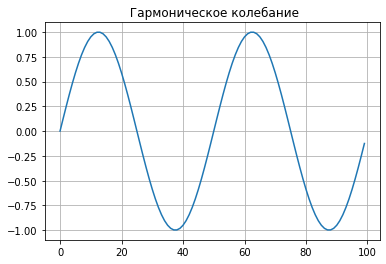

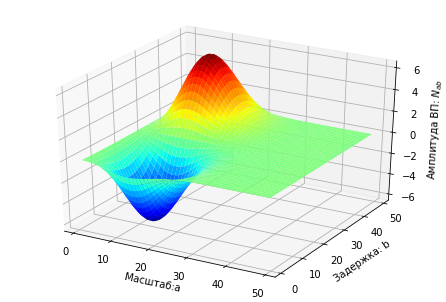

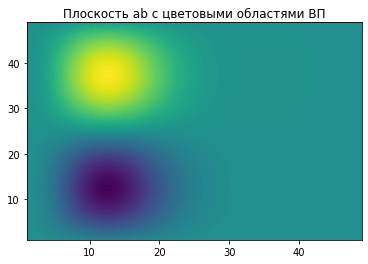

In [36]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
N=256
T=50
def S(t):
    return sin(2*pi*t/T)
plt.figure()
plt.title(' Гармоническое колебание', size=12)
y=[S(t) for t in arange(0,100,1)]
x=[t for t in arange(0,100,1)]
plt.plot(x,y)
plt.grid()
def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)
x = arange(1,50,1)
y = arange(1,50,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(49,49)
fig = plt.figure("Вейвлет- спектр: гармонического колебания")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()

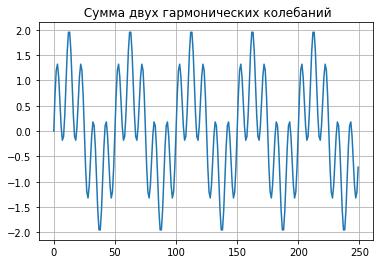

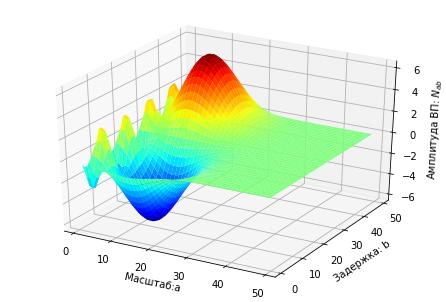

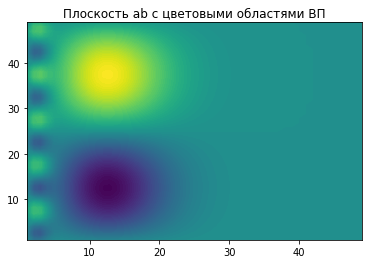

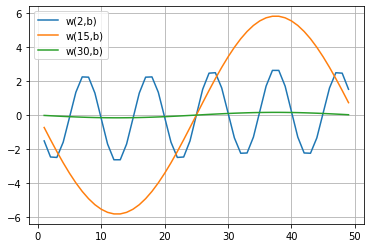

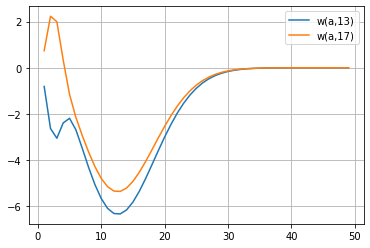

In [6]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
N=256
def S(t):
    return sin(2*pi*t/10)+sin(2*pi*t/50)
plt.figure(' Сумма двух гармонических колебаний')
plt.title(' Сумма двух гармонических колебаний', size=12)
y=[S(t) for t in arange(0,250,1)]
x=[t for t in arange(0,250,1)]
plt.plot(x,y)
plt.grid()
def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)
x = arange(1,50,1)
y = arange(1,50,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(49, 49)
fig = plt.figure("Вейвлет-спектр:2-х гармонических колебаний")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z, 100)
plt.figure()
q=[w(2,i) for i in y]
p=[i for i in y]
plt.plot(p,q,label='w(2,b)')
q=[w(15,i) for i in y]
plt.plot(p,q,label='w(15,b)')
q=[w(30,i) for i in y]
plt.plot(p,q,label='w(30,b)')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
q=[w(i,13) for i in x]
p=[i for i in x]
plt.plot(p,q,label='w(a,13)')
q=[w(i,17) for i in x]
plt.plot(p,q,label='w(a,17)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

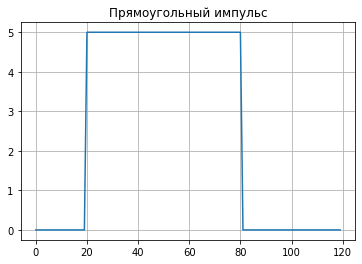

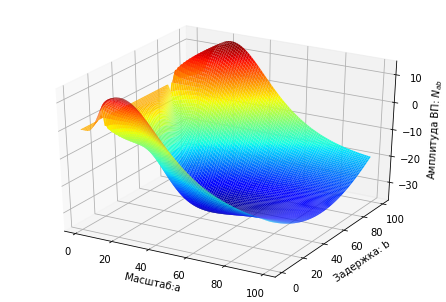

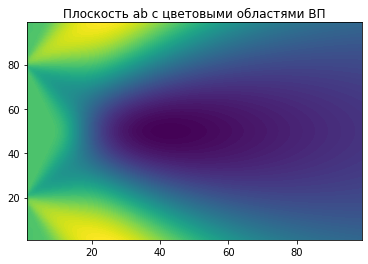

In [7]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
N=256
def S(t):
    U=5;t0=20;tau=60
    if  t0<=t<=t0+tau:
        return U
    else:
        return 0
plt.figure()
plt.title('Прямоугольный импульс', size=12)
y=[S(t) for t in arange(0,120,1)]
x=[t for t in arange(0,120,1)]
plt.plot(x,y)
plt.grid()
def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)
x = arange(1,100,1)
y = arange(1,100,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(99, 99)
fig = plt.figure("3D-график вейвлет спектрограммы")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()